# Doing statistics in Python

Important note: I am by no means a statistical advisor.
I will just show you today how to use a couple of packages to do some statistical tests.
Basically, I provide some pointers.
When doing analyses on your own data, make your own decisions on which tests to use.

The reference guides for the packages we used in this session are here:
* SciPy Stats: https://docs.scipy.org/doc/scipy/reference/stats.html
* Statsmodels: https://www.statsmodels.org/stable/index.html
* Seaborn: https://seaborn.pydata.org/index.html
* Pandas: https://pandas.pydata.org/
* Numpy: https://numpy.org/doc/stable/

If you are stuck, consult Stackoverflow. Your question has probably been asked before.

## 0. We import the relevant modules

In [2]:
import math
import statistics
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 1. Load the data

In [3]:
path = 'C:\\Users\\sopsla\\desktop\\session5'

In [4]:
# load the data we used last week
participants = pd.read_csv(os.path.join(path, 'participants.csv'))

# use a for-loop to go through the participant list and load the data
trials = pd.DataFrame()
for participant_id in participants['id']:
    trials = trials.append(pd.read_csv(os.path.join(path, f'participants\\{participant_id}.csv')))
    
# merge participant and trial data
trials = trials.merge(participants, on='id')
trials.rename(columns={'Unnamed: 0': 'trial_order'}, inplace=True)

A fun thing about notebooks: you can easily preview what you're working with.

In [5]:
trials

,trial_order,id,condition,RT,first_name,last_name,age,sex
0,0,83633,condition_a,711.093867,Stacy,Burton,33,male
1,1,83633,baseline,351.301881,Stacy,Burton,33,male
2,2,83633,condition_a,720.382681,Stacy,Burton,33,male
3,3,83633,condition_a,329.828212,Stacy,Burton,33,male
4,4,83633,baseline,188.586183,Stacy,Burton,33,male
...,...,...,...,...,...,...,...,...
1195,115,90709,baseline,399.521017,Natalie,Newton,23,female
1196,116,90709,condition_b,174.347050,Natalie,Newton,23,female
1197,117,90709,baseline,160.265914,Natalie,Newton,23,female
1198,118,90709,baseline,357.141627,Natalie,Newton,23,female


### NaN-values

In [6]:
no_of_trials = np.shape(trials)[0]
nan_indices = np.random.permutation(no_of_trials)[0:60]
trials_NA = trials.copy()

# replace values using pd.loc: function allows you to access a group of rows and columns by label(s)
trials_NA.loc[nan_indices, 'RT'] = np.nan
trials_NA

,trial_order,id,condition,RT,first_name,last_name,age,sex
0,0,83633,condition_a,711.093867,Stacy,Burton,33,male
1,1,83633,baseline,351.301881,Stacy,Burton,33,male
2,2,83633,condition_a,720.382681,Stacy,Burton,33,male
3,3,83633,condition_a,329.828212,Stacy,Burton,33,male
4,4,83633,baseline,188.586183,Stacy,Burton,33,male
...,...,...,...,...,...,...,...,...
1195,115,90709,baseline,399.521017,Natalie,Newton,23,female
1196,116,90709,condition_b,174.347050,Natalie,Newton,23,female
1197,117,90709,baseline,160.265914,Natalie,Newton,23,female
1198,118,90709,baseline,357.141627,Natalie,Newton,23,female


### First exploration

In [7]:
summary = trials.groupby(by='condition').aggregate(
    mean_RT=pd.NamedAgg('RT', np.mean),
    median_RT=pd.NamedAgg('RT', np.median),
    std_RT=pd.NamedAgg('RT', np.std),
    mean_age=pd.NamedAgg('age', np.mean)
)

# reset the index (we've seen this last week)
summary.reset_index(inplace=True)
print(summary)

     condition     mean_RT   median_RT      std_RT  mean_age
0     baseline  481.484448  405.965007  283.582387      23.3
1  condition_a  759.387950  634.627644  476.263170      23.3
2  condition_b  452.634481  372.003101  301.176629      23.3


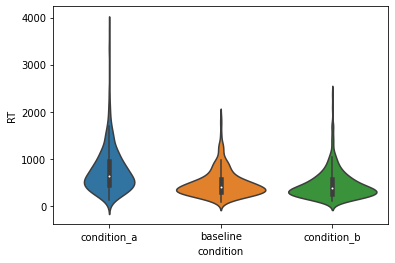

In [8]:
ax = sns.violinplot(x="condition", y="RT", data=trials)

Good to know: using Pandas's groupby-function handles your NaN-values for you. However, if you just want to get some means...

In [9]:
python_stats = statistics.mean(trials_NA["RT"])
numpy_stats = np.mean(trials_NA["RT"])

print(python_stats, numpy_stats)

nan 562.8246144535033


So if you want to use python_stats, you should remove your NaN-values. How to do this? Using Pandas dropna function.

In [10]:
trials_dropna = trials_NA.dropna()

## 2. Testing assumptions

### Assumptions to perform a t-test
1. Scale of measurement: ordinal or continuous scale
2. Simple random sample & reasonable sample size
3. <b>Normal distribution</b> of means
4. Homogeneity of variance

### Normal distribution
1. Gaphical methods: Plotting & evaluating

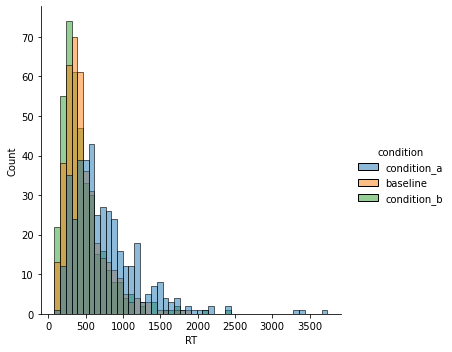

In [11]:
# Use Seaborn for a simple histogram
sns.displot(trials, x="RT", hue="condition")

This is not a normal distribution; it is skewed and can be best described by an exponential. But wait - the <b>means</b> have to be normally distributed! 

       id    condition      mean_RT      std_RT
0   24639     baseline   523.639055  319.469700
1   24639  condition_a   916.551797  545.207917
2   24639  condition_b   460.798286  236.760201
3   37321     baseline   424.567080  215.411905
4   37321  condition_a   603.750397  270.696958
5   37321  condition_b   388.912371  182.121480
6   52845     baseline   413.013402  219.242907
7   52845  condition_a   686.390174  452.023739
8   52845  condition_b   437.927877  226.634697
9   59785     baseline   472.227320  208.705638
10  59785  condition_a   758.023053  329.912416
11  59785  condition_b   434.643061  254.261131
12  73722     baseline   428.556514  194.670902
13  73722  condition_a   634.495483  438.848007
14  73722  condition_b   355.593687  181.032672
15  82441     baseline   408.739791  233.067667
16  82441  condition_a   770.723383  315.030863
17  82441  condition_b   415.092448  310.812162
18  83312     baseline   414.506491  215.217321
19  83312  condition_a   764.396811  578

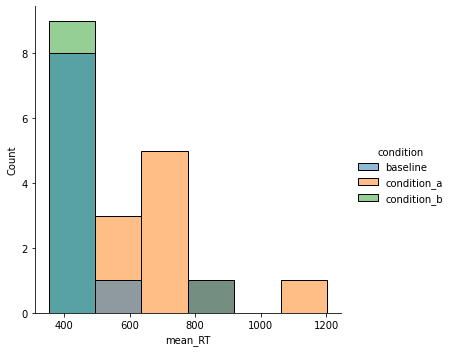

In [12]:
pmeans = trials.groupby(by=['id', 'condition']).aggregate(
    mean_RT=pd.NamedAgg('RT', np.mean),
    std_RT=pd.NamedAgg('RT', np.std))

pmeans.reset_index(inplace=True)
print(pmeans)

ax = sns.displot(pmeans, x="mean_RT", hue="condition", kde=False)

OK, another plot. Let's try a QQplot with SciPy.

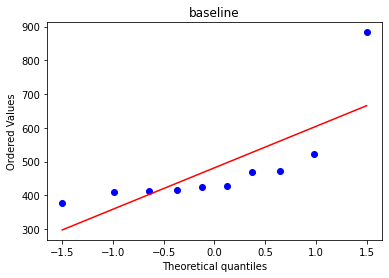

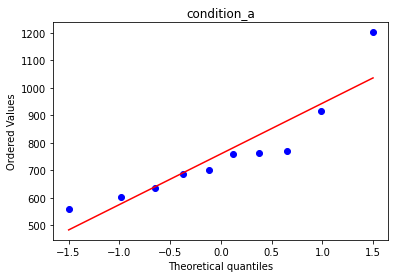

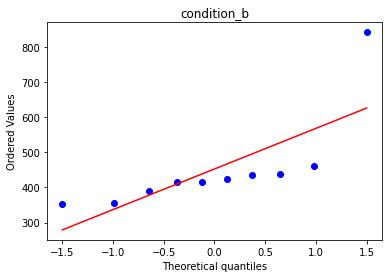

In [13]:
for cond in ['baseline', 'condition_a', 'condition_b']:
    plot = stats.probplot(pmeans.loc[pmeans['condition']==cond, 'mean_RT'], plot=plt)
    plt.title(str(cond))
    plt.show()

That looks better. Let's try a statistical test: the <b>Shapiro-Wilk test for normality</b>.

We use scipy.stats for this.

Important to keep in mind: The Shapiro-Wilk test (or another test, Kolmogorov-Smirnov) is too sensitive when sample sizes are large.

In [14]:
# Simple shapiro test:
pmeans.groupby('condition').aggregate(stats.shapiro)

,id,mean_RT,std_RT
condition,,,
baseline,"(0.874459445476532, 0.11263599246740341)","(0.620363175868988, 9.681240771897137e-05)","(0.8636189103126526, 0.08417253196239471)"
condition_a,"(0.874459445476532, 0.11263599246740341)","(0.8505377173423767, 0.058951131999492645)","(0.9184719324111938, 0.3443862199783325)"
condition_b,"(0.874459445476532, 0.11263599246740341)","(0.6019946932792664, 5.8417375839781016e-05)","(0.7196709513664246, 0.0015260997461155057)"


In [15]:
shapiro_results = pmeans.groupby(by='condition').aggregate(
    shapiro=pd.NamedAgg('mean_RT',stats.shapiro))

shapiro_results.reset_index(inplace=True)
shapiro_results

,condition,shapiro
0,baseline,"(0.620363175868988, 9.681240771897137e-05)"
1,condition_a,"(0.8505377173423767, 0.058951131999492645)"
2,condition_b,"(0.6019946932792664, 5.8417375839781016e-05)"


## 3. T-test with SciPy

In [16]:
base = trials.loc[trials['condition']=='baseline', 'RT']
a = trials.loc[trials['condition']=='condition_a', 'RT']

stats.ttest_rel(base,a, nan_policy='raise')

Ttest_relResult(statistic=-10.9576963613722, pvalue=1.323983612406216e-24)

In [17]:
for cond in ['condition_a', 'condition_b']:
    y = trials.loc[trials['condition']==cond, 'RT']
    print(stats.ttest_rel(base, y, nan_policy='raise'))

Ttest_relResult(statistic=-10.9576963613722, pvalue=1.323983612406216e-24)
Ttest_relResult(statistic=1.5860581787217045, pvalue=0.11351827606570147)


So both conditions are (very) different from the baseline. Now - do the conditions differ from each other?

In [18]:
a = trials.loc[trials['condition']=='condition_a', 'RT']
b = trials.loc[trials['condition']=='condition_b', 'RT']
print(stats.ttest_rel(a, b, nan_policy='raise'))

Ttest_relResult(statistic=12.205167485188879, pvalue=2.4767918471336657e-29)


Of course, we should correct for multiple comparisons here. 
We can do this, but it would be better to use a repeated measures ANOVA.
For this, we need the package <b>Statsmodels.</b>

You have not installed this, so please run ```pip install statsmodels``` in  your terminal.

## 4. Anova and LMM using Statsmodels

### Anova

In [19]:
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

In [20]:
aov = AnovaRM(
    trials,
    depvar='RT',
    subject='id',
    within=['condition'],
    aggregate_func='mean'
).fit()

print(aov)

                 Anova
          F Value  Num DF  Den DF Pr > F
----------------------------------------
condition 133.4263 2.0000 18.0000 0.0000



### Linear Mixed Models

* Formula to specify the model. Here: ```RT ~ condition```
* Data for the model. Here: ```trials```
* Re_formula: one-sided formula defining the variance structure of the model (Default = random intercept for each group). Here: 1
* Groups: random intercept

In [21]:
import statsmodels.formula.api as smf

lmm0 = smf.mixedlm("RT ~ condition", trials, groups = 'id', re_formula='1')
lmm0f = lmm0.fit()
print(lmm0f.summary())

                 Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      RT         
No. Observations:      1200         Method:                  REML       
No. Groups:            10           Scale:                   111885.7503
Min. group size:       120          Log-Likelihood:          -8679.7654 
Max. group size:       120          Converged:               Yes        
Mean group size:       120.0                                            
------------------------------------------------------------------------
                           Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
------------------------------------------------------------------------
Intercept                  481.484   50.806  9.477 0.000 381.906 581.063
condition[T.condition_a]   277.904   23.652 11.750 0.000 231.546 324.261
condition[T.condition_b]   -28.850   23.652 -1.220 0.223 -75.208  17.508
id Var                   23015.503   33.879                          

In [22]:
lmm1 = smf.mixedlm("RT ~ condition + age", trials, groups = 'id', re_formula='1')
lmm1f = lmm1.fit()
print(lmm1f.summary())

                  Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      RT         
No. Observations:        1200         Method:                  REML       
No. Groups:              10           Scale:                   111885.7429
Min. group size:         120          Log-Likelihood:          -8676.3073 
Max. group size:         120          Converged:               Yes        
Mean group size:         120.0                                            
--------------------------------------------------------------------------
                           Coef.   Std.Err.   z    P>|z|  [0.025   0.975] 
--------------------------------------------------------------------------
Intercept                  447.344  306.739  1.458 0.145 -153.852 1048.541
condition[T.condition_a]   277.904   23.652 11.750 0.000  231.546  324.261
condition[T.condition_b]   -28.850   23.652 -1.220 0.223  -75.208   17.508
age                          1.465   12.962 

In [24]:
lmm2 = smf.mixedlm("RT ~ condition + age + condition * age", trials, groups = 'id', re_formula='1')
lmm2f = lmm2.fit()
print(lmm2f.summary())

                    Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        RT         
No. Observations:        1200           Method:                    REML       
No. Groups:              10             Scale:                     111960.8365
Min. group size:         120            Log-Likelihood:            -8670.4574 
Max. group size:         120            Converged:                 Yes        
Mean group size:         120.0                                                
------------------------------------------------------------------------------
                               Coef.   Std.Err.   z    P>|z|  [0.025   0.975] 
------------------------------------------------------------------------------
Intercept                      420.276  316.885  1.326 0.185 -200.807 1041.360
condition[T.condition_a]       390.342  139.794  2.792 0.005  116.350  664.333
condition[T.condition_b]       -60.085  139.794 -0.430 0.667 -334.076  21

In [23]:
lmm3 = smf.mixedlm("RT ~ condition + condition * age", trials, groups = 'id', re_formula='1')
lmm3f = lmm3.fit()
print(lmm3f.summary())

                    Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        RT         
No. Observations:        1200           Method:                    REML       
No. Groups:              10             Scale:                     111960.8365
Min. group size:         120            Log-Likelihood:            -8670.4574 
Max. group size:         120            Converged:                 Yes        
Mean group size:         120.0                                                
------------------------------------------------------------------------------
                               Coef.   Std.Err.   z    P>|z|  [0.025   0.975] 
------------------------------------------------------------------------------
Intercept                      420.276  316.885  1.326 0.185 -200.807 1041.360
condition[T.condition_a]       390.342  139.794  2.792 0.005  116.350  664.333
condition[T.condition_b]       -60.085  139.794 -0.430 0.667 -334.076  21

That's all for today!

# Homework
Create an analysis-notebook for your experiment of choice.
It should contain at least:
* A table summarizing your data
* A plot of your contrast of interest
* A statistical test to determine its significance
* Text boxes in markdown describing what you are doing.

When you are done, create a GIT repository (with whichever name you like) and store in it:
* The scripts you wrote for stimulus preparation
* Your scripts for the experiment
* Your data
* The notebook for data analysis

This has just become your <b>personal Python reference repository</b>.

I will make a Slack channel where you can share repositories with each other.